In [1]:
# Warmup 0: Pandas!
import pandas as pd

In [2]:
# Warmup 1: What happened last time? Leave this commented out.
# user_fruits = []
# while(True):
#     print("Current fruits", user_fruits)
#     try:
#         fruit_name = input("Enter a name for the fruit... ")
#         fruit_seeds = int(input("Enter a num_seeds for the fruit... "))
#         fruit_juicy = float(input("Enter a juicyness for the fruit... "))
#         user_fruits.append(Fruit(fruit_name, fruit_seeds, fruit_juicy))
#     except: # SOMETHING WENT WRONG HERE! We couldn't exit!
#         print("Name must be a str, num_seeds must be an int, and juicyness must be a float!")
#         print(type(e))

# https://docs.python.org/3/library/exceptions.html

In [3]:
# Warmup 2: What are your 2 favorite data structures that we have learned so far?

In [4]:
# Warmup 3: Find the mean, median, mode, and standard deviation
#           of the following list of scores.
my_scores = [44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84]

# Pandas

**What is Pandas?**
 - Pandas is a package of tools for doing Data Science
 - Pandas was installed with Anaconda, so its on your computers
 - [Learn More](https://en.wikipedia.org/wiki/Pandas_(software))

A Pandas Series is like a combination of a list and a dictionary. The word 'index' is used to describe position.


## Series from a `list`

In [5]:
scores = pd.Series([44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84])
scores

0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64

A Pandas series acts a lot like a list; you can index and slice.

In [6]:
scores[3]

67

In [7]:
scores[3:6]

3    67
4    23
5    23
dtype: int64

In [8]:
## Series calculations
## mean, median, mode, quartiles, sd, count
print(scores.mean())
print(scores.median())
print(scores.std())


50.54545454545455
47.0
26.051347897426098


In [9]:
# There could be multiple modes, so mode returns a Series
print(scores.mode())

0    23
1    47
dtype: int64


In [10]:
# 5-Number summary
print(scores.quantile([1.0, 0.75, 0.5, 0.25, 0]))

1.00    92.0
0.75    72.5
0.50    47.0
0.25    27.5
0.00    19.0
dtype: float64


In [11]:
print(scores.quantile([0.9, 0.1]))

0.9    84.0
0.1    23.0
dtype: float64


`value_counts` creates a series where the index is the data, and the value is its count in the series

In [12]:
ages = pd.Series([18, 19, 20, 20, 20, 17, 18, 24, 25, 35, 22, 20, 21, 21, 20, 23, 23, 19, 19, 19, 20, 21])
ages.value_counts()

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

A series can be sorted by index or by values

In [13]:
ages.value_counts().sort_index()

17    1
18    2
19    4
20    6
21    3
22    1
23    2
24    1
25    1
35    1
dtype: int64

In [14]:
ages.value_counts().sort_values(ascending=False)

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

### Plotting

[Text(0.5, 0, 'age'), Text(0, 0.5, 'count')]

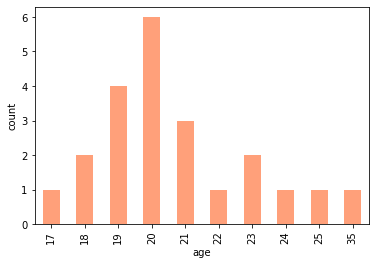

In [15]:
## Series bar chart
age_plot = ages.value_counts().sort_index().plot.bar(color='lightsalmon')
age_plot.set(xlabel = "age", ylabel = "count")

### Filtering
 - & means 'and'
 - | means 'or'
 - ~ means 'not'
 - we must use () for compound boolean expressions

In [16]:
# What ages are in the range 18 to 20, inclusive?
certain_students = ages[(ages >= 18) & (ages <= 20)]
certain_students

0     18
1     19
2     20
3     20
4     20
6     18
11    20
14    20
17    19
18    19
19    19
20    20
dtype: int64

In [17]:
# What percentage of students are in this age range?
len(certain_students) / len(ages)

0.5454545454545454

In [18]:
# What percentage of students are ages 18 OR 21?
stu_18_or_21 = ages[(ages == 18) | (ages == 20)]
len(stu_18_or_21) / len(ages)

0.36363636363636365

In [19]:
# what percentage of students are NOT 19? 
stu_not_19 = ages [~(ages==19)]
len(stu_not_19) / len(ages)

0.8181818181818182

In [20]:
# One more thing....we can perform an operation on all values in a Series
# Let's add 1 to everyone's age
print(ages.value_counts())
ages = ages + 1
print(ages.value_counts())

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64
21    6
20    4
22    3
19    2
24    2
18    1
25    1
26    1
36    1
23    1
dtype: int64


In [21]:
# Modified from https://automatetheboringstuff.com/chapter14/
import csv
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

data = process_csv("pokemon_stats.csv")
header = data[0]
print(len(data))
data = data[1:]
data[15:18]

886


[['15',
  'Pidgey',
  '45',
  '40',
  '40',
  'Kanto',
  '35',
  '35',
  '56',
  'Normal',
  'Flying'],
 ['16',
  'Pidgeotto',
  '60',
  '55',
  '63',
  'Kanto',
  '50',
  '50',
  '71',
  'Normal',
  'Flying'],
 ['17',
  'Pidgeot',
  '80',
  '75',
  '83',
  'Kanto',
  '70',
  '70',
  '101',
  'Normal',
  'Flying']]

In [22]:
# Create a Series of all the Pokemon names.
pokemon_list = [row[1] for row in data]
pokemons = pd.Series(pokemon_list)
pokemons

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
880     Regieleki
881     Regidrago
882     Glastrier
883     Spectrier
884       Calyrex
Length: 885, dtype: object

In [23]:
# Create a Series of all the Pokemon HPs.
hp_list = [int(row[4]) for row in data]
hps = pd.Series(hp_list)
hps

0       45
1       60
2       80
3       39
4       58
      ... 
880     80
881    200
882    100
883    100
884    100
Length: 885, dtype: int64

In [24]:
# Find the most common HP
hps.mode()

0    60
dtype: int64

In [25]:
# Find how many pokemon have that most common hp
len(hps[hps == hps.mode()[0]])

74

In [26]:
# How many Pokemon have HP between 50 and 75 (inclusive)? 
len(hps[(hps >= 50) & (hps <= 75)])

427

In [27]:
# What are the names of weak pokemon (<30 HP)?
weak_hps_idx = hps[hps < 30].index
pokemons[weak_hps_idx]

47       Diglett
60          Abra
78     Magnemite
124     Magikarp
167        Pichu
208      Shuckle
275        Ralts
287     Shedinja
344       Feebas
350      Duskull
760       Wimpod
812      Blipbug
871       Dreepy
dtype: object

In [28]:
# What are the names of the pokemon from strongest to weakest (using health)?
all_hps_desc = hps.sort_values(ascending=False)
pokemons[all_hps_desc.index]

237      Blissey
109      Chansey
787     Guzzlord
881    Regidrago
197    Wobbuffet
         ...    
350      Duskull
124     Magikarp
208      Shuckle
47       Diglett
287     Shedinja
Length: 885, dtype: object

## Series from a `dict`
A Series is a cross between a list and a dict, so we can make a series from a dict as well

In [29]:
## Series from a dict
game1points = pd.Series({"Chris": 10, "Kiara": 3, "Mikayla": 7, "Ann": 8, "Trish": 6})
print(game1points)

Chris      10
Kiara       3
Mikayla     7
Ann         8
Trish       6
dtype: int64


In [30]:
game2points = pd.Series({"Kiara": 7, "Chris": 3,  "Trish": 11, "Mikayla": 2, "Ann": 5})
print(game2points)

Kiara       7
Chris       3
Trish      11
Mikayla     2
Ann         5
dtype: int64


In [31]:
# Pandas can perform operations on two series by matching up their indices
total = game1points  + game2points
total

Ann        13
Chris      13
Kiara      10
Mikayla     9
Trish      17
dtype: int64

In [32]:
# Who has the most points?
print(total.max())
print(total.idxmax())

17
Trish


In [33]:
# We can use [] to name the index or by its sequence number
print(total['Kiara'], total[2])

10 10


In [34]:
# We can have multi-indexing....slightly different from slicing
total[["Chris", "Trish"]]

Chris    13
Trish    17
dtype: int64

In [35]:
total_sorted = total.sort_values(ascending=False)
total_sorted

Trish      17
Ann        13
Chris      13
Kiara      10
Mikayla     9
dtype: int64

Text(0, 0.5, 'total points')

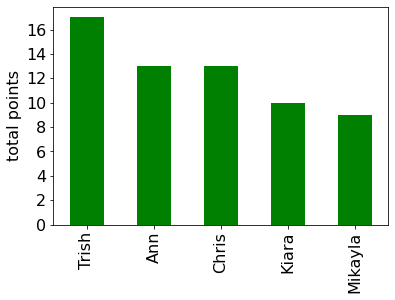

In [36]:
ax = total_sorted.plot.bar(color="green", fontsize=16)
ax.set_ylabel("total points", fontsize=16)

## More things to know about Series
Next time, we'll get into more ways to access data using `loc` and `iloc`.

We'll also talk about `DataFrame`, which is a series of series (like a spreadsheet!)

Feel overwhelmed? Do the required reading & worksheet. Pandas operations are good to put on your notesheet.